
# Lektion 4 - Scikit-learn API (Del 1)
## Assignment: Classification and regression with a common API

Instructions:
1. Use scikit-learn estimators and the .fit/.predict pattern
2. Compare models on the same dataset
3. Add short comments explaining results


In [1]:
# TODO: Load a dataset (iris, breast_cancer, or diabetes)
from sklearn.datasets import load_iris, load_diabetes 

data = load_iris()

X = data.data
y = data.target
target_names = data.target_names

print("X: ", X)
print("y: ", y)

X:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

In [2]:
# TODO: Create train/test split with a fixed random_state

# Here we often use a function (train_test_split)
# the function splits our data neatly into piles of train and test
# We could do this manually
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
    )


In [3]:
print(X_train.shape, X_test.shape)

(100, 4) (50, 4)


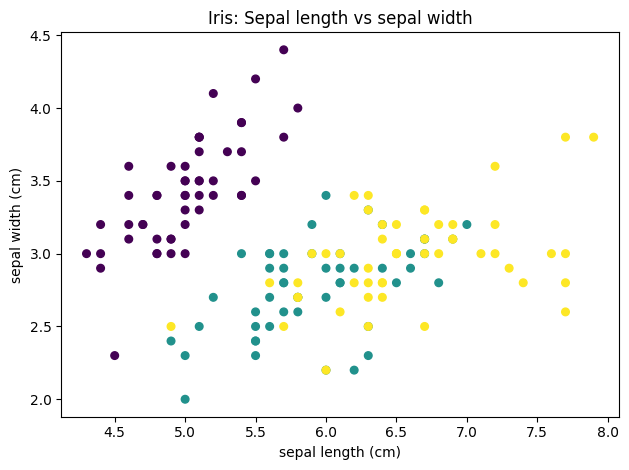

In [4]:
import matplotlib.pyplot as plt

# Med plt.plot() kan vi plotta data
# plot() tar data på listform, som kan skicka in på
# olika sätt

# Med plt.plot() plottar vi ett linjediagram
# Linjediagramet har jättemånga inställningar 
# De kan ni gräva i när ni behöver plotta
# "o":et är ett exempel på en inställning
# Den gör att vi plottar punkter istället för linjer

#plt.plot(X,y, 'o')


# Vår data är högdimensionell (4 dimensioner), 
# Så vi väljer att plotta två dimensioner
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30)

X[:23]

plt.title("Iris: Sepal length vs sepal width")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.tight_layout()
plt.show()

## Task 2: Two models, same API

#### TODO: Train LogisticRegression (classification) OR LinearRegression (regression)


In [5]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Först skapar vi en helt tom modell
LogReg = LogisticRegression(max_iter=100)

# Sen anpassar vi den till vår data
# Vi tränar den: den försöker hitta samband
# mellan vårt X (features) och y (target)
LogReg.fit(X_train, y_train)

# Vi utvärderar vår modell med testdata
y_pred = LogReg.predict(X_test)



Vår accuracy är: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



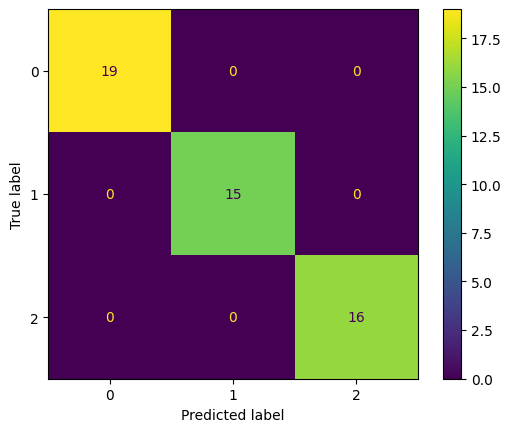

In [8]:
# Vi utvärderar vår modell genom att jämföra predictions mot faktiska värden
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Vår accuracy är:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix2 =confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix2).plot()


#### TODO: Train SVC (classification) OR Ridge (regression)


#### TODO: Use .fit() and .predict() for both


## Task 3: Metrics

#### TODO: For classification: accuracy, precision, recall, f1


#### TODO: For regression: MAE and R2


#### TODO: Print a short comparison and comment on which model you prefer
